<a href="https://colab.research.google.com/github/AG-2478/LocalRepo/blob/feature1/AirlineModelling2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
from pydot import graph_from_dot_data
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import LeakyReLU
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
from statsmodels.api import OLS
import statsmodels.api as sm
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import math

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/FlightDatasetModel1.0.csv')

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/Datasets/Airline_editedfull.csv')
df = df.replace(np.nan, 0)
df = df.drop(['Unnamed: 0'], axis=1)
print(df.shape)
df.head(5)

(635863, 70)


,TailNumber,FlightNumberReportingAirline,OriginAirportID,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,CRSDepTime,DepTime,DepDelay,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,CRSElapsedTime,ActualElapsedTime,NAirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,NTotalDelay,NGroundTime,DelayCheck,NCityTrafficFreq,NStateAirportCount,NFlightUsage,TotalDelayBucket,JourneyBtwCities,StateTraffic,TrafficPercent,StateSumOfDelays,DelayPercent,TrafficPerMinuteDelay,AptID_10397,AptID_11292,AptID_11298,AptID_12892,AptID_13930,TNo_#NAME?,TNo_N476HA,TNo_N478HA,TNo_N485HA,TNo_N486HA,FltNo_16,FltNo_3,FltNo_5,FltNo_55,FltNo_64,"OrCity_Atlanta, GA","OrCity_Chicago, IL","OrCity_Dallas/Fort Worth, TX","OrCity_Houston, TX","OrCity_Los Angeles, CA","OrCity_Atlanta, GA.1","OrCity_Chicago, IL.1","OrCity_Dallas/Fort Worth, TX.1","OrCity_Houston, TX.1","OrCity_Los Angeles, CA.1",OrState_California,OrState_Florida,OrState_Georgia,OrState_Illinois,OrState_Texas
0,N266Aä,2672,15304,"Tampa, FL",Florida,10721,"Boston, MA",Massachusetts,2001-01-01 17:25:00,2001-01-01 17:51:00,26.0,9.0,2001-01-01 18:00:00,2001-01-01 20:34:00,9.0,2001-01-01 20:28:00,2001-01-01 20:43:00,15.0,183.0,172.0,0.223358,1185.0,0.0,0.0,0.0,0.0,0.0,0.0,0.048632,0,0.175060,0.678571,0.000373,0,1,88237,6.800613,458230.0,6.848694,0.192561,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,N5CãA1,1961,14908,"Santa Ana, CA",California,11298,"Dallas/Fort Worth, TX",Texas,2001-01-01 06:48:00,2001-01-01 06:49:00,1.0,23.0,2001-01-01 07:12:00,2001-01-01 11:41:00,28.0,2001-01-01 11:53:00,2001-01-01 12:09:00,16.0,185.0,200.0,0.216058,1205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148936,0,0.112557,1.000000,0.000187,0,1,154908,11.939088,653507.0,9.767299,0.237041,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,N366@@,2124,14107,"Phoenix, AZ",Arizona,12889,"Las Vegas, NV",Nevada,2001-01-01 16:45:00,2001-01-01 16:45:00,0.0,9.0,2001-01-01 16:54:00,2001-01-01 16:36:00,4.0,2001-01-01 16:45:00,2001-01-01 16:40:00,-5.0,60.0,55.0,0.059854,256.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033435,0,0.448498,0.107143,0.002241,0,1,42531,3.277954,157642.0,2.356113,0.269795,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,#NAME?,4261,13930,"Chicago, IL",Illinois,14122,"Pittsburgh, PA",Pennsylvania,2001-01-01 13:45:00,2001-01-01 13:39:00,-6.0,32.0,2001-01-01 14:11:00,2001-01-01 16:14:00,4.0,2001-01-01 16:19:00,2001-01-01 16:18:00,-1.0,94.0,99.0,0.090511,412.0,0.0,0.0,0.0,0.0,0.0,0.0,0.103343,0,1.000000,0.214286,0.347899,0,1,85831,6.615177,595893.0,8.906201,0.144038,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,N524ä1,838,14771,"San Francisco, CA",California,11618,"Newark, NJ",New Jersey,2001-01-01 13:25:00,2001-01-01 13:30:00,5.0,40.0,2001-01-01 14:10:00,2001-01-01 22:05:00,12.0,2001-01-01 21:41:00,2001-01-01 22:17:00,36.0,316.0,347.0,0.429197,2565.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151976,0,0.334493,1.000000,0.000373,0,1,154908,11.939088,653507.0,9.767299,0.237041,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
newdf = df.copy()

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
newdf = newdf.astype(float)

In [ ]:
#removing features that do not shw significant change
qconstant_filter = VarianceThreshold(threshold=0.01)
x = qconstant_filter.fit(newdf)
len(newdf.columns[qconstant_filter.get_support()])

56

In [ ]:
#to check those constant columns
qconstant_columns = [column for column in newdf.columns
                    if column not in newdf.columns[qconstant_filter.get_support()]]

print(len(qconstant_columns))
for column in qconstant_columns:
    print(column)

In [ ]:
newdf.shape

(635863, 60)

In [ ]:
correlated_features = set()
correlation_matrix = newdf.corr()

In [ ]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [ ]:
correlated_features = correlated_features.remove('TotalDelayBucket')
#correlated_features = correlated_features.remove('NTotalDelay')
#len(correlated_features)

In [ ]:
print(len(correlated_features))

In [ ]:
#removing correlated features

#dfn = newdf.drop(labels=correlated_features, axis=1)
print(dfn.shape)
dfn.head(5)

(635863, 19)


,Unnamed: 0,FlightNumberReportingAirline,OriginAirportID,DestAirportID,DepDelay,TaxiOut,TaxiIn,CRSElapsedTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DelayCheck,NCityTrafficFreq,NStateAirportCount,NFlightUsage,JourneyBtwCities,TrafficPerMinuteDelay
0,0.0,2672.0,15304.0,10721.0,26.0,9.0,9.0,183.0,0.0,0.0,0.0,0.0,0.0,0.0,0.175060,0.678571,0.000373,1.0,0.192561
1,1.0,1961.0,14908.0,11298.0,1.0,23.0,28.0,185.0,0.0,0.0,0.0,0.0,0.0,0.0,0.112557,1.000000,0.000187,1.0,0.237041
2,2.0,2124.0,14107.0,12889.0,0.0,9.0,4.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.448498,0.107143,0.002241,1.0,0.269795
3,3.0,4261.0,13930.0,14122.0,-6.0,32.0,4.0,94.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.214286,0.347899,1.0,0.144038
4,4.0,838.0,14771.0,11618.0,5.0,40.0,12.0,316.0,0.0,0.0,0.0,0.0,0.0,0.0,0.334493,1.000000,0.000373,1.0,0.237041


###Feature Importance through random forest

In [ ]:
X = newdf.loc[:, newdf.columns !='DelayCheck']
X = X.loc[:, X.columns !='NTotalDelay']
X = X.loc[:, X.columns !='TotalDelayBucket']

Y = newdf['TotalDelayBucket']
X.shape


(635863, 57)

In [ ]:
X.head(10)

,Unnamed: 0,FlightNumberReportingAirline,OriginAirportID,DestAirportID,DepDelay,TaxiOut,TaxiIn,ArrDelay,CRSElapsedTime,ActualElapsedTime,NAirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,NGroundTime,NCityTrafficFreq,NStateAirportCount,NFlightUsage,JourneyBtwCities,StateTraffic,TrafficPercent,StateSumOfDelays,DelayPercent,TrafficPerMinuteDelay,AptID_10397,AptID_11292,AptID_11298,AptID_12892,AptID_13930,TNo_#NAME?,TNo_N476HA,TNo_N478HA,TNo_N485HA,TNo_N486HA,FltNo_16,FltNo_3,FltNo_5,FltNo_55,FltNo_64,"OrCity_Atlanta, GA","OrCity_Chicago, IL","OrCity_Dallas/Fort Worth, TX","OrCity_Houston, TX","OrCity_Los Angeles, CA","OrCity_Atlanta, GA.1","OrCity_Chicago, IL.1","OrCity_Dallas/Fort Worth, TX.1","OrCity_Houston, TX.1","OrCity_Los Angeles, CA.1",OrState_California,OrState_Florida,OrState_Georgia,OrState_Illinois,OrState_Texas
0,0.0,2672.0,15304.0,10721.0,26.0,9.0,9.0,15.0,183.0,172.0,0.223358,1185.0,0.0,0.0,0.0,0.0,0.0,0.048632,0.175060,0.678571,0.000373,1.0,88237.0,6.800613,458230.0,6.848694,0.192561,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,1961.0,14908.0,11298.0,1.0,23.0,28.0,16.0,185.0,200.0,0.216058,1205.0,0.0,0.0,0.0,0.0,0.0,0.148936,0.112557,1.000000,0.000187,1.0,154908.0,11.939088,653507.0,9.767299,0.237041,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.0,2124.0,14107.0,12889.0,0.0,9.0,4.0,-5.0,60.0,55.0,0.059854,256.0,0.0,0.0,0.0,0.0,0.0,0.033435,0.448498,0.107143,0.002241,1.0,42531.0,3.277954,157642.0,2.356113,0.269795,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3.0,4261.0,13930.0,14122.0,-6.0,32.0,4.0,-1.0,94.0,99.0,0.090511,412.0,0.0,0.0,0.0,0.0,0.0,0.103343,1.000000,0.214286,0.347899,1.0,85831.0,6.615177,595893.0,8.906201,0.144038,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.0,838.0,14771.0,11618.0,5.0,40.0,12.0,36.0,316.0,347.0,0.429197,2565.0,0.0,0.0,0.0,0.0,0.0,0.151976,0.334493,1.000000,0.000373,1.0,154908.0,11.939088,653507.0,9.767299,0.237041,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,5.0,1995.0,10397.0,13204.0,84.0,33.0,2.0,90.0,92.0,98.0,0.090511,403.0,0.0,0.0,0.0,0.0,0.0,0.100304,0.948031,0.250000,0.000187,1.0,81242.0,6.261493,470160.0,7.026999,0.172796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6.0,5147.0,12478.0,10721.0,19.0,31.0,15.0,24.0,85.0,90.0,0.062774,187.0,0.0,0.0,0.0,0.0,0.0,0.133739,0.507404,0.428571,0.412512,1.0,58337.0,4.496156,401923.0,6.007131,0.145145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7.0,816.0,12953.0,10792.0,27.0,24.0,2.0,-4.0,102.0,71.0,0.064234,292.0,0.0,0.0,0.0,0.0,0.0,0.072948,0.507404,0.428571,0.000747,1.0,58337.0,4.496156,401923.0,6.007131,0.145145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8.0,2175.0,14683.0,14107.0,15.0,5.0,3.0,3.0,140.0,128.0,0.173723,843.0,0.0,0.0,0.0,0.0,0.0,0.018237,0.095950,0.857143,0.001307,1.0,146744.0,11.309872,725176.0,10.838462,0.202356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9.0,2422.0,13204.0,12264.0,47.0,15.0,7.0,39.0,130.0,122.0,0.144526,758.0,0.0,0.0,0.0,0.0,0.0,0.060790,0.285421,0.678571,0.032680,1.0,88237.0,6.800613,458230.0,6.848694,0.192561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(newdf.isnull().sum())

Unnamed: 0                             0
FlightNumberReportingAirline           0
OriginAirportID                        0
DestAirportID                          0
DepDelay                               0
TaxiOut                                0
TaxiIn                                 0
ArrDelay                               0
CRSElapsedTime                         0
ActualElapsedTime                      0
NAirTime                               0
Distance                               0
CarrierDelay                           0
WeatherDelay                           0
NASDelay                               0
SecurityDelay                          0
LateAircraftDelay                      0
NTotalDelay                            0
NGroundTime                            0
DelayCheck                             0
NCityTrafficFreq                       0
NStateAirportCount                     0
NFlightUsage                           0
TotalDelayBucket                       0
JourneyBtwCities

In [ ]:
X = X.replace(np.nan, 0)
Y = Y.replace(np.nan, 0)
X.head(10)

,Unnamed: 0,FlightNumberReportingAirline,OriginAirportID,DestAirportID,DepDelay,TaxiOut,TaxiIn,ArrDelay,CRSElapsedTime,ActualElapsedTime,NAirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,NGroundTime,NCityTrafficFreq,NStateAirportCount,NFlightUsage,JourneyBtwCities,StateTraffic,TrafficPercent,StateSumOfDelays,DelayPercent,TrafficPerMinuteDelay,AptID_10397,AptID_11292,AptID_11298,AptID_12892,AptID_13930,TNo_#NAME?,TNo_N476HA,TNo_N478HA,TNo_N485HA,TNo_N486HA,FltNo_16,FltNo_3,FltNo_5,FltNo_55,FltNo_64,"OrCity_Atlanta, GA","OrCity_Chicago, IL","OrCity_Dallas/Fort Worth, TX","OrCity_Houston, TX","OrCity_Los Angeles, CA","OrCity_Atlanta, GA.1","OrCity_Chicago, IL.1","OrCity_Dallas/Fort Worth, TX.1","OrCity_Houston, TX.1","OrCity_Los Angeles, CA.1",OrState_California,OrState_Florida,OrState_Georgia,OrState_Illinois,OrState_Texas
0,0.0,2672.0,15304.0,10721.0,26.0,9.0,9.0,15.0,183.0,172.0,0.223358,1185.0,0.0,0.0,0.0,0.0,0.0,0.048632,0.175060,0.678571,0.000373,1.0,88237.0,6.800613,458230.0,6.848694,0.192561,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,1961.0,14908.0,11298.0,1.0,23.0,28.0,16.0,185.0,200.0,0.216058,1205.0,0.0,0.0,0.0,0.0,0.0,0.148936,0.112557,1.000000,0.000187,1.0,154908.0,11.939088,653507.0,9.767299,0.237041,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.0,2124.0,14107.0,12889.0,0.0,9.0,4.0,-5.0,60.0,55.0,0.059854,256.0,0.0,0.0,0.0,0.0,0.0,0.033435,0.448498,0.107143,0.002241,1.0,42531.0,3.277954,157642.0,2.356113,0.269795,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3.0,4261.0,13930.0,14122.0,-6.0,32.0,4.0,-1.0,94.0,99.0,0.090511,412.0,0.0,0.0,0.0,0.0,0.0,0.103343,1.000000,0.214286,0.347899,1.0,85831.0,6.615177,595893.0,8.906201,0.144038,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.0,838.0,14771.0,11618.0,5.0,40.0,12.0,36.0,316.0,347.0,0.429197,2565.0,0.0,0.0,0.0,0.0,0.0,0.151976,0.334493,1.000000,0.000373,1.0,154908.0,11.939088,653507.0,9.767299,0.237041,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,5.0,1995.0,10397.0,13204.0,84.0,33.0,2.0,90.0,92.0,98.0,0.090511,403.0,0.0,0.0,0.0,0.0,0.0,0.100304,0.948031,0.250000,0.000187,1.0,81242.0,6.261493,470160.0,7.026999,0.172796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6.0,5147.0,12478.0,10721.0,19.0,31.0,15.0,24.0,85.0,90.0,0.062774,187.0,0.0,0.0,0.0,0.0,0.0,0.133739,0.507404,0.428571,0.412512,1.0,58337.0,4.496156,401923.0,6.007131,0.145145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7.0,816.0,12953.0,10792.0,27.0,24.0,2.0,-4.0,102.0,71.0,0.064234,292.0,0.0,0.0,0.0,0.0,0.0,0.072948,0.507404,0.428571,0.000747,1.0,58337.0,4.496156,401923.0,6.007131,0.145145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8.0,2175.0,14683.0,14107.0,15.0,5.0,3.0,3.0,140.0,128.0,0.173723,843.0,0.0,0.0,0.0,0.0,0.0,0.018237,0.095950,0.857143,0.001307,1.0,146744.0,11.309872,725176.0,10.838462,0.202356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9.0,2422.0,13204.0,12264.0,47.0,15.0,7.0,39.0,130.0,122.0,0.144526,758.0,0.0,0.0,0.0,0.0,0.0,0.060790,0.285421,0.678571,0.032680,1.0,88237.0,6.800613,458230.0,6.848694,0.192561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


array([0., 0., 0., ..., 0., 0., 0.])

Feature: 0, Score: 0.03266
Feature: 1, Score: 0.00684
Feature: 2, Score: 0.00374
Feature: 3, Score: 0.00480
Feature: 4, Score: 0.12542
Feature: 5, Score: 0.01354
Feature: 6, Score: 0.00511
Feature: 7, Score: 0.43423
Feature: 8, Score: 0.00661
Feature: 9, Score: 0.00712
Feature: 10, Score: 0.00590
Feature: 11, Score: 0.00587
Feature: 12, Score: 0.07999
Feature: 13, Score: 0.00920
Feature: 14, Score: 0.12426
Feature: 15, Score: 0.00044
Feature: 16, Score: 0.08321
Feature: 17, Score: 0.01597
Feature: 18, Score: 0.00389
Feature: 19, Score: 0.00224
Feature: 20, Score: 0.00658
Feature: 21, Score: 0.00967
Feature: 22, Score: 0.00243
Feature: 23, Score: 0.00247
Feature: 24, Score: 0.00244
Feature: 25, Score: 0.00246
Feature: 26, Score: 0.00291
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

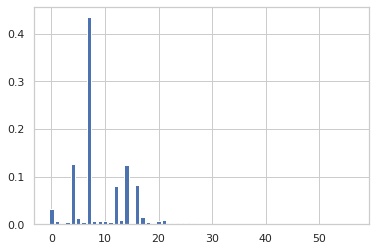

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, Y)
'''
rfe = RFE(model, 5)
rfe = rfe.fit(X, Y)
print(rfe.support_)
print(rfe.ranking_)
'''
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
idx = (-importance).argsort()[:15]
idx

array([ 7,  4, 14, 16, 12,  0, 17,  5, 21, 13,  9,  1,  8, 20, 10])

In [ ]:
c = X.columns
n=0
for i in c:
  print('Feature', n, i)
  n=n+1

Feature 0 Unnamed: 0
Feature 1 FlightNumberReportingAirline
Feature 2 OriginAirportID
Feature 3 DestAirportID
Feature 4 DepDelay
Feature 5 TaxiOut
Feature 6 TaxiIn
Feature 7 ArrDelay
Feature 8 CRSElapsedTime
Feature 9 ActualElapsedTime
Feature 10 NAirTime
Feature 11 Distance
Feature 12 CarrierDelay
Feature 13 WeatherDelay
Feature 14 NASDelay
Feature 15 SecurityDelay
Feature 16 LateAircraftDelay
Feature 17 NGroundTime
Feature 18 NCityTrafficFreq
Feature 19 NStateAirportCount
Feature 20 NFlightUsage
Feature 21 JourneyBtwCities
Feature 22 StateTraffic
Feature 23 TrafficPercent
Feature 24 StateSumOfDelays
Feature 25 DelayPercent
Feature 26 TrafficPerMinuteDelay
Feature 27 AptID_10397
Feature 28 AptID_11292
Feature 29 AptID_11298
Feature 30 AptID_12892
Feature 31 AptID_13930
Feature 32 TNo_#NAME?
Feature 33 TNo_N476HA
Feature 34 TNo_N478HA
Feature 35 TNo_N485HA
Feature 36 TNo_N486HA
Feature 37 FltNo_16
Feature 38 FltNo_3
Feature 39 FltNo_5
Feature 40 FltNo_55
Feature 41 FltNo_64
Feature 42 

###Modelling for checking delay

In [ ]:
from sklearn.model_selection import train_test_split
def lim_var_delaycheck(df, s1, s2, s3, s4, s5, s6, v1):
  X = df[[s1, s2, s3, s4, s5, s6]].values
  Y = df[[v1]]
  #train and test
#'NGroundTime' is depndent on certain local conditions. It cannot be predicted before the flight.
#X = X.values.reshape(-1,1)
#Y = Y.values.reshape(-1,1)
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 12)
  #x_train, x_vld, y_train, y_vld = train_test_split(x,y,test_size = 0.25,random_state = 12)
  return x_train, x_test, y_train, y_test


In [ ]:
x_train, x_test, y_train, y_test = lim_var_delaycheck(newdf,'NGroundTime','WeatherDelay','NAirTime','JourneyBtwCities','NFlightUsage','FlightNumberReportingAirline','TotalDelayBucket')
x_train.shape

(476897, 6)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 20, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix\n",cm)
print("\nAccuracy score\n", accuracy_score(y_test, y_pred))
print("\nReport\n",classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until



Confusion matrix
 [[130303      0      5      1      0      0      0      0      0      0
       0      0      0      0]
 [  1155      0      0      0      0      0      0      0      0      0
       0      0      0      0]
 [ 11162      0      0      0      0      0      0      0      0      0
       0      0      0      0]
 [  5378      0      3      6      1      2      0      0      1      0
       0      0      0      0]
 [  3104      0      7     11     10      5      0      0      0      0
       0      0      0      0]
 [  2044      0      7      6     13     12      3      2      0      1
       0      0      0      0]
 [  1398      0      8      8     14     10      3      1      1      0
       0      0      0      0]
 [  1018      0      2     11     12      9      9      6      2      0
       0      0      0      0]
 [   714      0      4     10      7     14      1      3      3      0
       0      0      2      0]
 [   556      0      2      1      8      9      3    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print()
classifier.predict_proba(x_test)[0:5,:]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [ ]:
y_pred_prob = classifier.predict_proba(x_test)

No handles with labels found to put in legend.


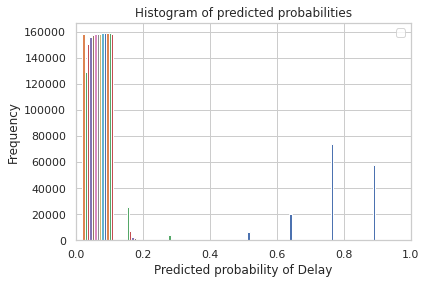

In [ ]:
plt.hist(y_pred_prob, bins=8)
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Delay')
plt.ylabel('Frequency')
plt.legend()

In [ ]:
y_test.shape

(158966, 1)

In [ ]:
import sklearn.metrics as metrics
#ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr,tpr)
plt.xlim([0,1.0])
plt.ylim([0,1.0])
plt.title('ROC curve for Airline delay classifier')
plt.xlabel('False Positive Rate(1-specificity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.grid(True)

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score




np.random.seed(0)

degrees = [1, 4, 15]

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    #pipeline = Pipeline([("polynomial_features", polynomial_features),
                        # ("linear_regression", linear_regression)])
    #classifier.fit(X[:, np.newaxis], Y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(classifier, X, Y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(x_test, classifier.predict(x_test), label="Model")
    plt.plot(x_test, y_test, label="True function")
    plt.scatter(X, Y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

In [ ]:
plt.plot(Y,train_scores)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 12)
classifier.fit(x_train, y_train)

# Predicting a new result
#print(classifier.predict(sc.transform([[30,87000]])))

# Predicting the Test set results
y_pred = classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix\n",cm)
print("\nAccuracy score\n", accuracy_score(y_test, y_pred))
print("\nReport\n",classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until



Confusion matrix
 [[129271     14    732    169     54     29     15      5      7      2
       1      1      2      7]
 [  1048     27     59     12      8      1      0      0      0      0
       0      0      0      0]
 [  9883      5   1016    160     56     16      6      9      4      2
       0      0      1      4]
 [  4431     10    332    477     86     24     14      2      5      1
       4      2      0      3]
 [  2502      1    183    117    263     42     13      2      3      3
       1      0      1      6]
 [  1687      5     91     63     64    136     18      8      6      3
       3      0      0      4]
 [  1126      3     66     50     37     33     99     16      5      2
       0      1      1      4]
 [   803      2     52     36     25     26     17     88      8      2
       2      1      0      7]
 [   565      0     43     26     13     10     17      9     54      7
       1      1      4      8]
 [   429      0     36     16     13      8     12    

In [ ]:
model = keras.Sequential(
    [
     keras.Input(shape=(6)),
     layers.Dense(256,activation='relu', use_bias=True),
     #layers.Dense(512, activation='sigmoid'),
     layers.Dense(1),
    ]
)

print(model.summary()) #gives info about the network

#from_logits - it uses softmax function and then uses crossentropy
#If there is no 'sparse' in cross entropy, then it is for one-hot encodings

model.add(LeakyReLU(alpha=0.1))
keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics=['accuracy'])

#Verbose - means prints after each epoch
#accuracy on training and test sets are displayed
history = model.fit(x_train, y_train, batch_size=64, validation_split= 0.25, epochs=100, verbose=2)
#history2 = model.fit(x_test, y_test, batch_size=32,epochs=20, verbose=2)

model.evaluate(x_test, y_test, batch_size=32,verbose=2)
#history = model.fit(X_train_scalled, y_train, validation_split=0.2, epochs=100)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               1792      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
5589/5589 - 9s - loss: 43.8212 - accuracy: 0.6615 - val_loss: 38.6053 - val_accuracy: 0.8159
Epoch 2/100
5589/5589 - 8s - loss: 12.8547 - accuracy: 0.6891 - val_loss: 15.0385 - val_accuracy: 0.8086
Epoch 3/100
5589/5589 - 8s - loss: 8.1365 - accuracy: 0.6706 - val_loss: 4.0491 - val_accuracy: 0.4858
Epoch 4/100
5589/5589 - 8s - loss: 6.0002 - accuracy: 0.6518 - val_loss: 4.7843 - val_accuracy: 0.0089
Epoch 5/100
5589/5589 - 8s - loss: 4.9920 - accuracy: 0.6227 - val_loss: 4.8958 - val_accurac

[3.121349811553955, 0.430117130279541]

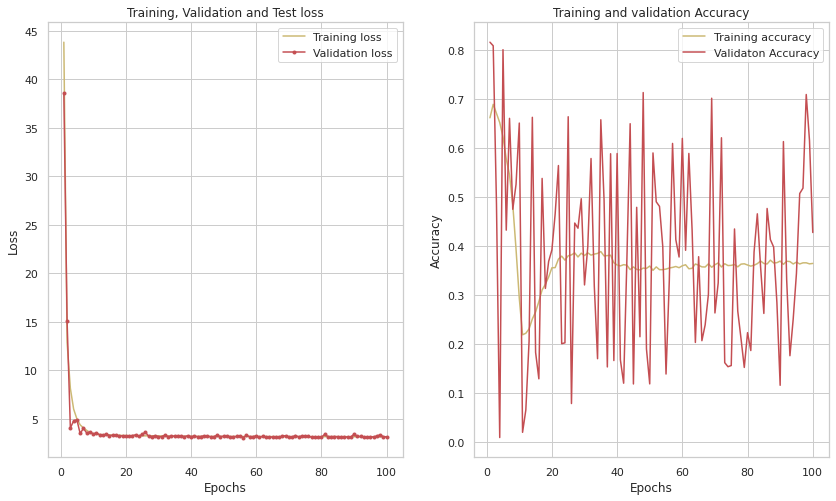

In [ ]:
import seaborn as sns
sns.set(style = 'whitegrid')
plt.figure(figsize=((14,8)))

plt.subplot(1,2,1)
loss = history.history['loss']
val_loss = history.history['val_loss']
#test_loss = history2.history['loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r.-', label='Validation loss')
#plt.plot(epochs, test_loss, 'g.-', label='Test loss')
plt.title('Training, Validation and Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs,acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validaton Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###Modelling for predicting delay

Feature importance for regressor

In [ ]:
newdf.shape

(648743, 55)

In [ ]:
correlated_features.remove('NTotalDelay')
print(correlated_features)


{'CRSArrTime', 'DepTime', 'ArrivalDelayGroups', 'Distance', 'WheelsOff', 'ActualElapsedTime', 'ArrTime', 'NAirTime', 'NGroundTime', 'Month', 'DepartureDelayGroups', 'DistanceGroup', 'TotalDelayBucket', 'ArrDelay'}


In [ ]:
dfs = newdf.drop(labels=correlated_features, axis=1)
print(dfs.shape)
dfs.head(5)

(648743, 41)


,W1,W2,W3,W4,W5,W6,W7,Y1,Y2,Y3,Y4,Year,Quarter,DayofMonth,DayOfWeek,FlightNumberReportingAirline,OriginAirportID,OriginCityMarketID,OriginWac,DestAirportID,DestCityMarketID,DestWac,CRSDepTime,DepDelay,TaxiOut,WheelsOn,TaxiIn,Cancelled,CancellationCode,Diverted,CRSElapsedTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,NTotalDelay,DelayCheck,NCityTrafficFreq,NStateAirportCount,NFlightUsage
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2003.0,4.0,21.0,5.0,674.0,13930.0,30977.0,41.0,12953.0,31703.0,22.0,900.0,-5.0,14.0,1148.0,2.0,0.0,0.0,0.0,126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.214286,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2002.0,2.0,2.0,4.0,2408.0,12339.0,32337.0,42.0,13204.0,31454.0,33.0,1300.0,-1.0,14.0,1611.0,8.0,0.0,0.0,0.0,133.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.088476,0.107143,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2004.0,4.0,21.0,2.0,1111.0,10423.0,30423.0,74.0,11540.0,30615.0,74.0,1150.0,0.0,10.0,1220.0,5.0,0.0,0.0,0.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.108983,0.857143,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2003.0,2.0,6.0,5.0,7659.0,13029.0,33029.0,65.0,13930.0,30977.0,41.0,1330.0,0.0,3.0,1444.0,35.0,0.0,0.0,0.0,85.0,0.0,0.0,24.0,0.0,0.0,24.0,1.0,0.006540,0.071429,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2001.0,4.0,11.0,4.0,378.0,14107.0,30466.0,81.0,13796.0,32457.0,91.0,650.0,0.0,15.0,847.0,3.0,0.0,0.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.448498,0.107143,0.0


In [ ]:
newdf.head(5)

,Unnamed: 0,FlightNumberReportingAirline,OriginAirportID,DestAirportID,DepDelay,TaxiOut,TaxiIn,ArrDelay,CRSElapsedTime,ActualElapsedTime,NAirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,NTotalDelay,NGroundTime,DelayCheck,NCityTrafficFreq,NStateAirportCount,NFlightUsage,TotalDelayBucket,JourneyBtwCities,StateTraffic,TrafficPercent,StateSumOfDelays,DelayPercent,TrafficPerMinuteDelay,AptID_10397,AptID_11292,AptID_11298,AptID_12892,AptID_13930,TNo_#NAME?,TNo_N476HA,TNo_N478HA,TNo_N485HA,TNo_N486HA,FltNo_16,FltNo_3,FltNo_5,FltNo_55,FltNo_64,"OrCity_Atlanta, GA","OrCity_Chicago, IL","OrCity_Dallas/Fort Worth, TX","OrCity_Houston, TX","OrCity_Los Angeles, CA","OrCity_Atlanta, GA.1","OrCity_Chicago, IL.1","OrCity_Dallas/Fort Worth, TX.1","OrCity_Houston, TX.1","OrCity_Los Angeles, CA.1",OrState_California,OrState_Florida,OrState_Georgia,OrState_Illinois,OrState_Texas
0,0.0,2672.0,15304.0,10721.0,26.0,9.0,9.0,15.0,183.0,172.0,0.223358,1185.0,0.0,0.0,0.0,0.0,0.0,0.0,0.048632,0.0,0.175060,0.678571,0.000373,0.0,1.0,88237.0,6.800613,458230.0,6.848694,0.192561,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,1961.0,14908.0,11298.0,1.0,23.0,28.0,16.0,185.0,200.0,0.216058,1205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148936,0.0,0.112557,1.000000,0.000187,0.0,1.0,154908.0,11.939088,653507.0,9.767299,0.237041,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.0,2124.0,14107.0,12889.0,0.0,9.0,4.0,-5.0,60.0,55.0,0.059854,256.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033435,0.0,0.448498,0.107143,0.002241,0.0,1.0,42531.0,3.277954,157642.0,2.356113,0.269795,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3.0,4261.0,13930.0,14122.0,-6.0,32.0,4.0,-1.0,94.0,99.0,0.090511,412.0,0.0,0.0,0.0,0.0,0.0,0.0,0.103343,0.0,1.000000,0.214286,0.347899,0.0,1.0,85831.0,6.615177,595893.0,8.906201,0.144038,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.0,838.0,14771.0,11618.0,5.0,40.0,12.0,36.0,316.0,347.0,0.429197,2565.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151976,0.0,0.334493,1.000000,0.000373,0.0,1.0,154908.0,11.939088,653507.0,9.767299,0.237041,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#preparing data
X = newdf.loc[:, newdf.columns !='DelayCheck']
X = X.loc[:, X.columns !='TotalDelayBucket']
X = X.loc[:, X.columns !='NTotalDelay']

Y = newdf['TotalDelayBucket']
X.shape

(635863, 57)

In [ ]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, Y)
print(X_selected.shape)

In [ ]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, Y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
c = newdf.columns
n=0
for i in c:
  print('Feature', n, i)
  n=n+1

Feature 0 Unnamed: 0
Feature 1 FlightNumberReportingAirline
Feature 2 OriginAirportID
Feature 3 DestAirportID
Feature 4 DepDelay
Feature 5 TaxiOut
Feature 6 TaxiIn
Feature 7 ArrDelay
Feature 8 CRSElapsedTime
Feature 9 ActualElapsedTime
Feature 10 NAirTime
Feature 11 Distance
Feature 12 CarrierDelay
Feature 13 WeatherDelay
Feature 14 NASDelay
Feature 15 SecurityDelay
Feature 16 LateAircraftDelay
Feature 17 NTotalDelay
Feature 18 NGroundTime
Feature 19 DelayCheck
Feature 20 NCityTrafficFreq
Feature 21 NStateAirportCount
Feature 22 NFlightUsage
Feature 23 TotalDelayBucket
Feature 24 JourneyBtwCities
Feature 25 StateTraffic
Feature 26 TrafficPercent
Feature 27 StateSumOfDelays
Feature 28 DelayPercent
Feature 29 TrafficPerMinuteDelay
Feature 30 AptID_10397
Feature 31 AptID_11292
Feature 32 AptID_11298
Feature 33 AptID_12892
Feature 34 AptID_13930
Feature 35 TNo_#NAME?
Feature 36 TNo_N476HA
Feature 37 TNo_N478HA
Feature 38 TNo_N485HA
Feature 39 TNo_N486HA
Feature 40 FltNo_16
Feature 41 FltNo

In [ ]:
idx = (-importance).argsort()[:6]
idx

In [ ]:
x_train, x_test, y_train, y_test = lim_var_delaycheck(dfs,'NGroundTime','WeatherDelay','TaxiOut','JourneyBtwCities','NFlightUsage','FlightNumberReportingAirline','DelayCheck')
x_train.shape

(486557, 6)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


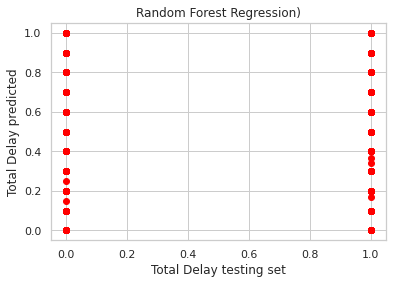

In [ ]:

# Training the Random Forest Regression model on the whole dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 12)
regressor.fit(x_train, y_train)

# Predicting a new result
#y_predict = regressor.predict([[x_test]])
y_pred = regressor.predict(x_test)
# Visualising the Random Forest Regression results (higher resolution)
#X_grid = np.arange(min(X), max(X), 0.01)
#X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(y_test, regressor.predict(x_test) , color = 'red')
#plt.plot(y_test, regressor.predict(x_test), color = 'blue')
plt.title('Random Forest Regression)')
plt.xlabel('Total Delay testing set')
plt.ylabel('Total Delay predicted')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.9876574645042618


In [ ]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 3.573636048898382


(162186, 1)


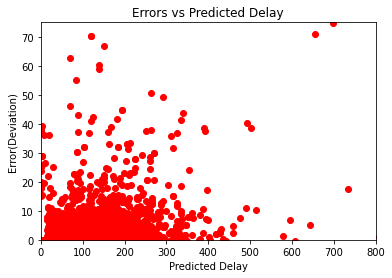

In [ ]:
# calculate errors
errors = []
y_pred = regressor.predict(x_test)
#changing shape of y_pred according to y_test
y_pred1 = y_pred[np.newaxis]
y_pred2 = y_pred1.T
print(y_pred2.shape)
#calculating errors
err =[]
err = np.subtract(y_test,y_pred2)
errors=[]
errors = np.square(err)
#plotting errors vs predicted values
plt.scatter(y_pred2, err, color = 'red')
#plt.plot(y_test, regressor.predict(x_test), color = 'blue')
plt.title('Errors vs Predicted Delay')
plt.xlabel('Predicted Delay')
plt.ylabel('Error(Deviation)')
plt.xlim([0,800])
plt.ylim([0,75])
plt.show()

In [ ]:
import scipy as sp
from scipy.interpolate import interp1d
# 300 represents number of points to make between T.min and T.max
xnew = np.linspace(y_pred2.min(), y_pred2.max(), 3000)

power_smooth = sp.interpolate.interp1d(y_pred2, err)(xnew)

plt.plot(xnew,power_smooth)
plt.show()

In [ ]:
print(y_pred2.shape)
print(err.shape)

(162186, 1)
(162186, 1)


In [ ]:
pyplot.plot(errors)
pyplot.xticks(ticks=[i for i in range(len(errors))])
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Mean Squared Error')
pyplot.show()

###Neural networks

In [ ]:
model = keras.Sequential(
    [
     keras.Input(shape=(6)),
     layers.Dense(256,activation='relu', use_bias=True),
     #layers.Dense(512, activation='sigmoid'),
     layers.Dense(1),
    ]
)

print(model.summary()) #gives info about the network

#from_logits - it uses softmax function and then uses crossentropy
#If there is no 'sparse' in cross entropy, then it is for one-hot encodings

model.add(LeakyReLU(alpha=0.1))
keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics=['accuracy'])

#Verbose - means prints after each epoch
#accuracy on training and test sets are displayed
history = model.fit(x_train, y_train, batch_size=64, validation_split= 0.25, epochs=20, verbose=2)
#history2 = model.fit(x_test, y_test, batch_size=32,epochs=20, verbose=2)

model.evaluate(x_test, y_test, batch_size=32,verbose=2)
#history = model.fit(X_train_scalled, y_train, validation_split=0.2, epochs=100)



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 256)               1792      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 257       
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
5702/5702 - 10s - loss: 5.3250 - accuracy: 0.7932 - val_loss: 0.2868 - val_accuracy: 0.8123
Epoch 2/20
5702/5702 - 9s - loss: 1.6013 - accuracy: 0.8093 - val_loss: 0.2732 - val_accuracy: 0.8124
Epoch 3/20
5702/5702 - 8s - loss: 1.3574 - accuracy: 0.8092 - val_loss: 0.2654 - val_accuracy: 0.8132
Epoch 4/20
5702/5702 - 9s - loss: 1.3274 - accuracy: 0.8091 - val_loss: 0.2556 - val_accuracy: 0.8131
Epoch 5/20
5702/5702 - 8s - loss: 1.3026 - accuracy: 0.8103 - val_loss: 0.5440 - val_accuracy: 0.813

[0.3274230659008026, 0.8127211928367615]

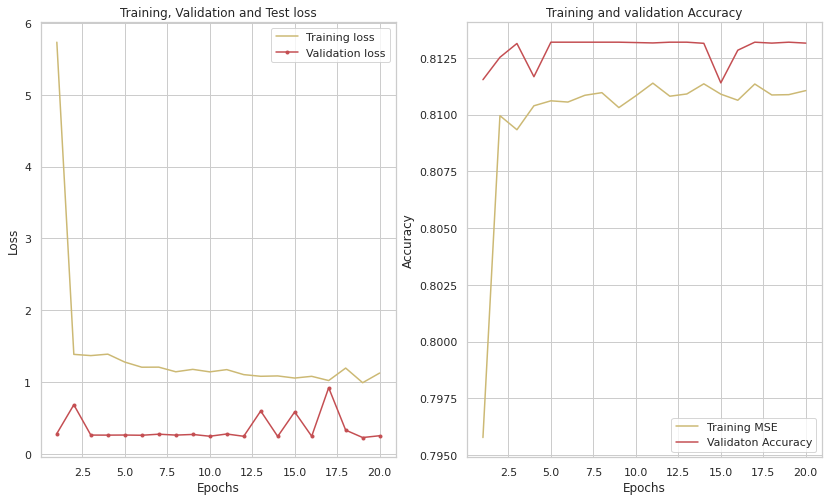

In [ ]:
import seaborn as sns
sns.set(style = 'whitegrid')
plt.figure(figsize=((14,8)))

plt.subplot(1,2,1)
loss = history.history['loss']
val_loss = history.history['val_loss']
#test_loss = history2.history['loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r.-', label='Validation loss')
#plt.plot(epochs, test_loss, 'g.-', label='Test loss')
plt.title('Training, Validation and Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs,acc, 'y', label='Training MSE')
plt.plot(epochs, val_acc, 'r', label='Validaton Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
for i in range(len(y_test)):
  #calculate error
  err = y_test[i] - y_pred[i]
  # store error
  err = err**2
  errors.append(err)
  # report error
  print('>%.1f, %.1f = %.3f' % (y_test[i], y_pred[i], err))
# plot errors
pyplot.plot(errors)
pyplot.xticks(ticks=[i for i in range(len(errors))])
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Mean Squared Error')
pyplot.show()

In [ ]:
# compile the keras model
model.compile(loss='mse', optimizer='adam')
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=2)


In [ ]:
#correlation matrix
corr = newdf.corr()
corr = corr.replace(np.nan, 0)
corr = corr.replace(np.inf, 0)
#corr

In [ ]:
import numpy as np
def condition_number(corr):# corr: correlation matrix
    eigValues,eigVectors = np.linalg.eig(corr)
    return abs(max(eigValues)/min(eigValues))
 # greadily kick out the worst feature
def eliminate_multicol(X, threshold = 100):#weak corr threshold
    corr = np.corrcoef(X.T) # get corr matrix
    if (condition_number(corr) < threshold or X.shape[1]<=1):
        return X
    # find the feature with highest corr coef(lower triangle)
    mostCorrelated = np.argmax([max(corr[i+1:,i]) for i in range(X.shape[1]-1)] )
    choose = [True]*X.shape[1]
    choose[mostCorrelated] = False # kick that feature out
    return eliminate_multicol(X[:,choose])

In [ ]:
x = condition_number(corr)
d = eliminate_multicol(newdf)
d

In [ ]:
# max() is used to compare for Lowerbound
for i in range(len(y_test)):
  #calculate error
  err = y_test[i] - y_pred2[i]
  # store error
  err = err**2
  errors.append(err)
  # report error
  print('>%.1f, %.1f = %.3f' % (y_test[i], y_pred2[i], err))
# plot errors
pyplot.plot(errors)
pyplot.xticks(ticks=[i for i in range(len(errors))])
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Mean Squared Error')
pyplot.show()